# <font color='red'> **Credit Card Project** </font>

# **Dataset column glossory:**

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Necessary Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

# **Read dataset**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Classroom/Shai lvl 2 traning | 2024 A/Credit Card dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

# **Studying dataset**

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


summarizing important points:

1)Most customers have around $1564.47 in their accounts, which is the usual amount.

2)Customers usually update their balance about 88% of the time.

3)On average, customers spend about $1003.20.
One-time purchases are typically around $592.44, showing occasional large purchases.

4)Installment-based purchases, averaging about $411.07, are a significant part of customer spending.

5)Customers occasionally use cash advances, averaging $978.87.

6)Customers generally make purchases about 49% of the time, indicating regular buying habits.

7)One-time purchases have an average frequency of about 20%, showing sporadic large purchases.

8)Installment purchases have an average frequency of about 36%, suggesting consistent payment patterns.

9)The average frequency of cash advances is about 14%, showing occasional use.

10)On average, customers have about 3.25 cash advance transactions, indicating how often they use this service.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**CREDIT_LIMIT** and **MINIMUM_PAYMENTS** contains NULL values. Since, the first one have one missing value and the other have 313 missing value, we have to deal with them in approprite way.

#**Checking Duplicates**

In [ ]:
# Check for duplicate Values
df.duplicated().sum()

0

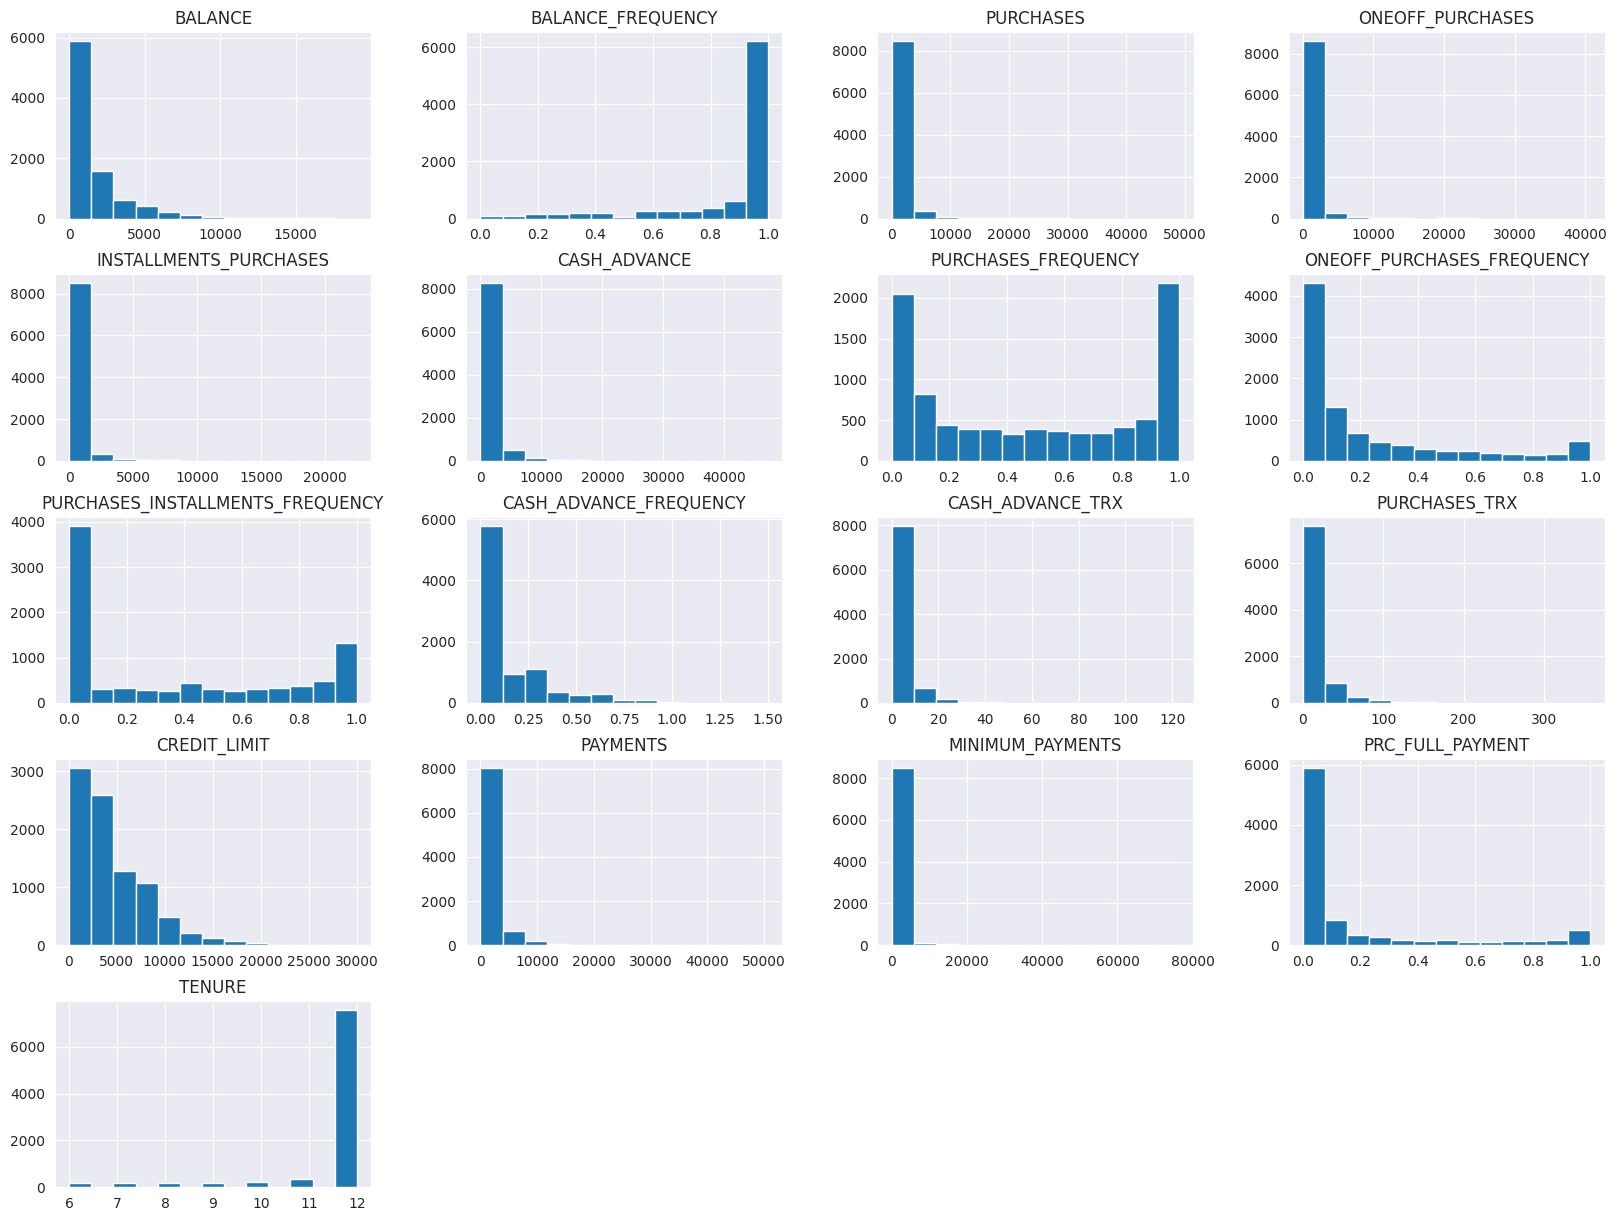

In [ ]:
# Dropping any object related variable
num_df = df.drop("CUST_ID", axis = 1)

num_df.hist(bins=13, figsize=(20, 15), layout=(5, 4));

In [ ]:
# Rechecking duplicates after droping "CUS_ID" column
num_df.duplicated().sum()

0

# **Polyvariate analysis**

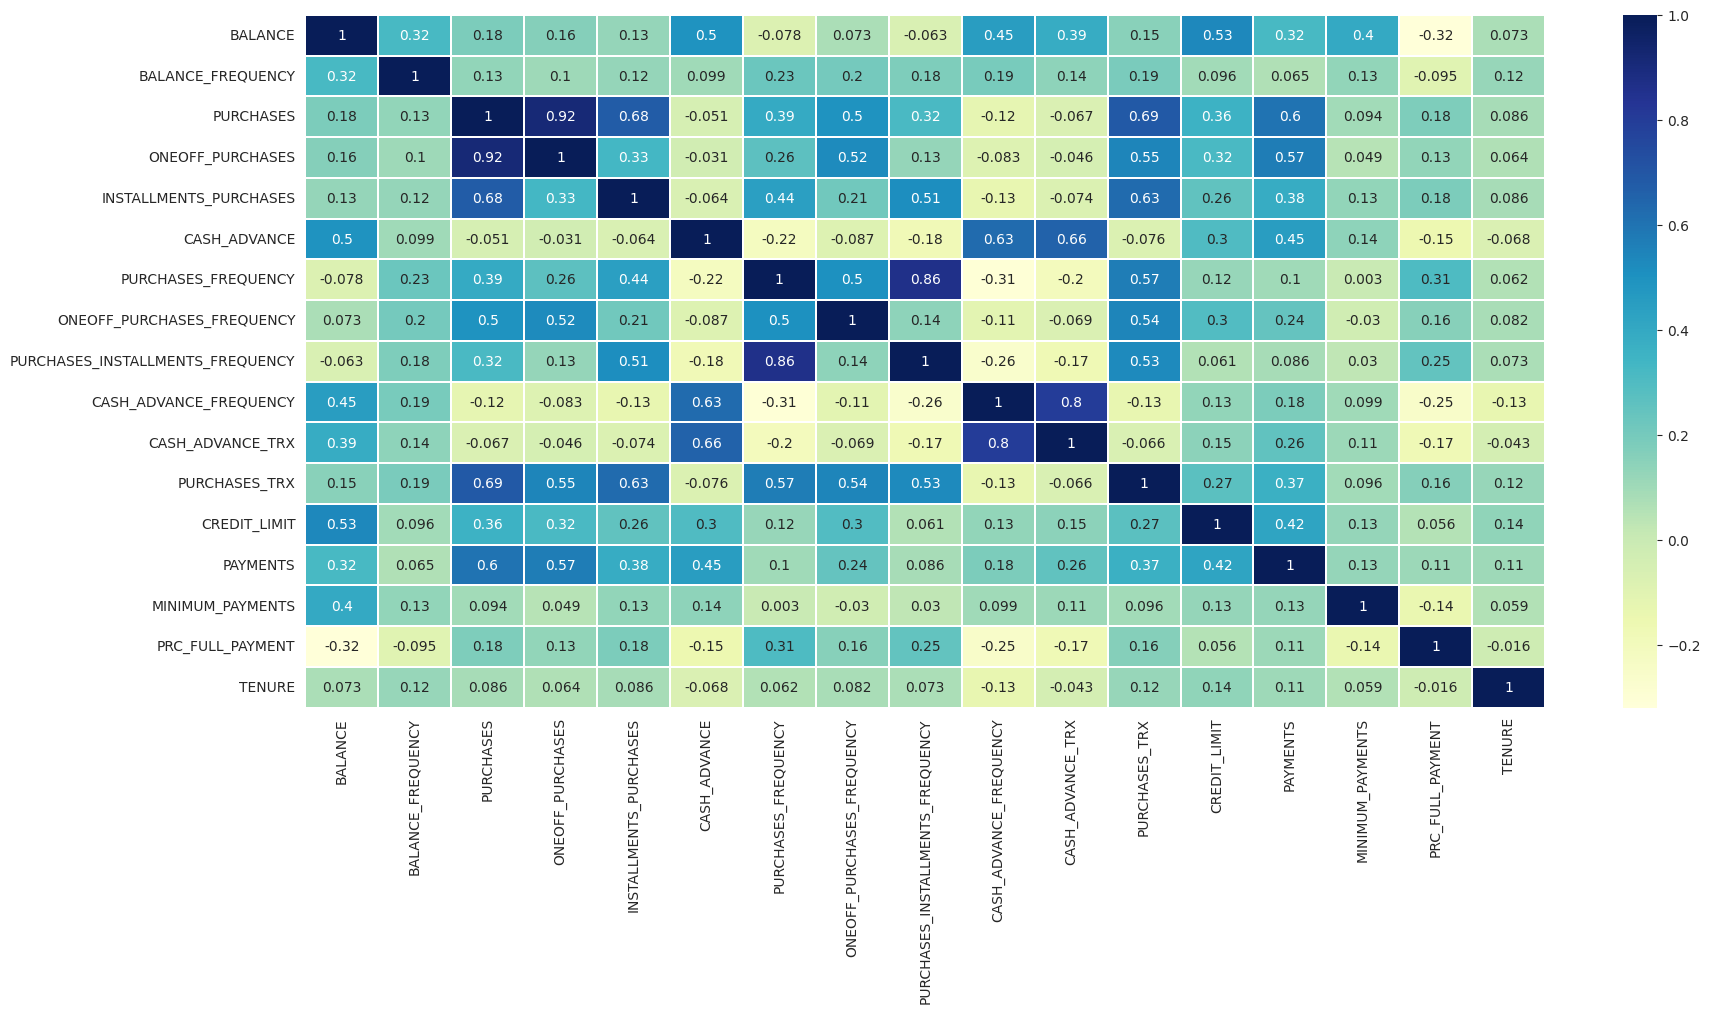

In [ ]:
corrmat = num_df.corr()

f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True);

**Modirate Postive Corelation observed between:**
**(Maybe meaningful correlation)**

*   BALANCE and CREDIT_LIMIT
*   BALANCE and CASH_ADVANCE
*   PURCHASES and PAYMENTS
*   PURCHASES and ONEOFF_PURCHASES_FREQUENCY
*   ONEOFF_PURCHASES and PAYMENTS


**Modirate positive corelation due to derived definition**
**(Maybe not meaningful correlation)**

*   PURCHASES and PURCHASES_TRX
*   PURCHASES and ONEOFF_PURCHASES **(Highly Postive Corelated)**
*   PURCHASES and INSTALLMENTS_PURCHASES
*   ONEOFF_PURCHASES and PURCHASES_TRX
*   ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY
*   INSTALLMENTS_PURCHASES and PURCHASES_TRX
*   INSTALLMENTS_PURCHASES and INSTALLMENTS_PURCHASES_FREQUENCY
*   CASH_ADVANCE and CASH_ADVANCE_FREQUENCY
*   CASH_ADVANCE and CASH_ADVANCE_TRX
*   PURCHASES_FREQUENCY and PURCHASES_TRX
*   PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY **(Highly Postive Corelated)**
*   PURCHASES_FREQUENCY and ONEOFF_PURCHASES_FREQUENCY
*   ONEOFF_PURCHASES_FREQUENCY and PURCHASES_TRX
*   PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_TRX
*   CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX **(Highly Postive Corelated)**


# **Dealing with Missing data**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [ ]:
null_columns = df.columns[df.isnull().any()].tolist()


# Perform Imputation on missing data
if len(null_columns) > 0:
    imputer = KNNImputer()
    df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
    df = df.fillna(df_imp)



In [ ]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [ ]:
# Dropping any object related variable
num_df = df.drop("CUST_ID", axis = 1)

# **Checking for Outliers**

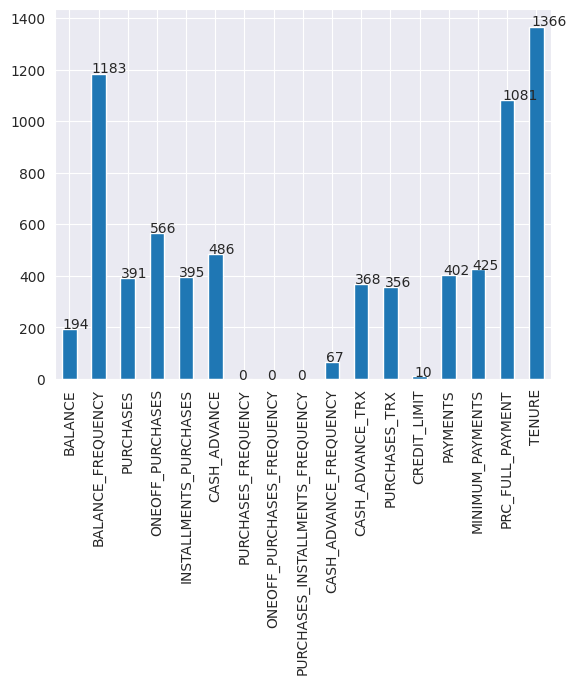

In [ ]:
# Skewed distripution outliers
IQ_range=num_df.quantile(0.75)-num_df.quantile(0.25)
lower_bridge=num_df.quantile(0.25)-(IQ_range*3)
upper_bridge=num_df.quantile(0.75)+(IQ_range*3)

outliers_table=((num_df < lower_bridge) | (num_df >  upper_bridge)).sum()
sns.set_style('darkgrid')

ax=outliers_table.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# **Standardization**

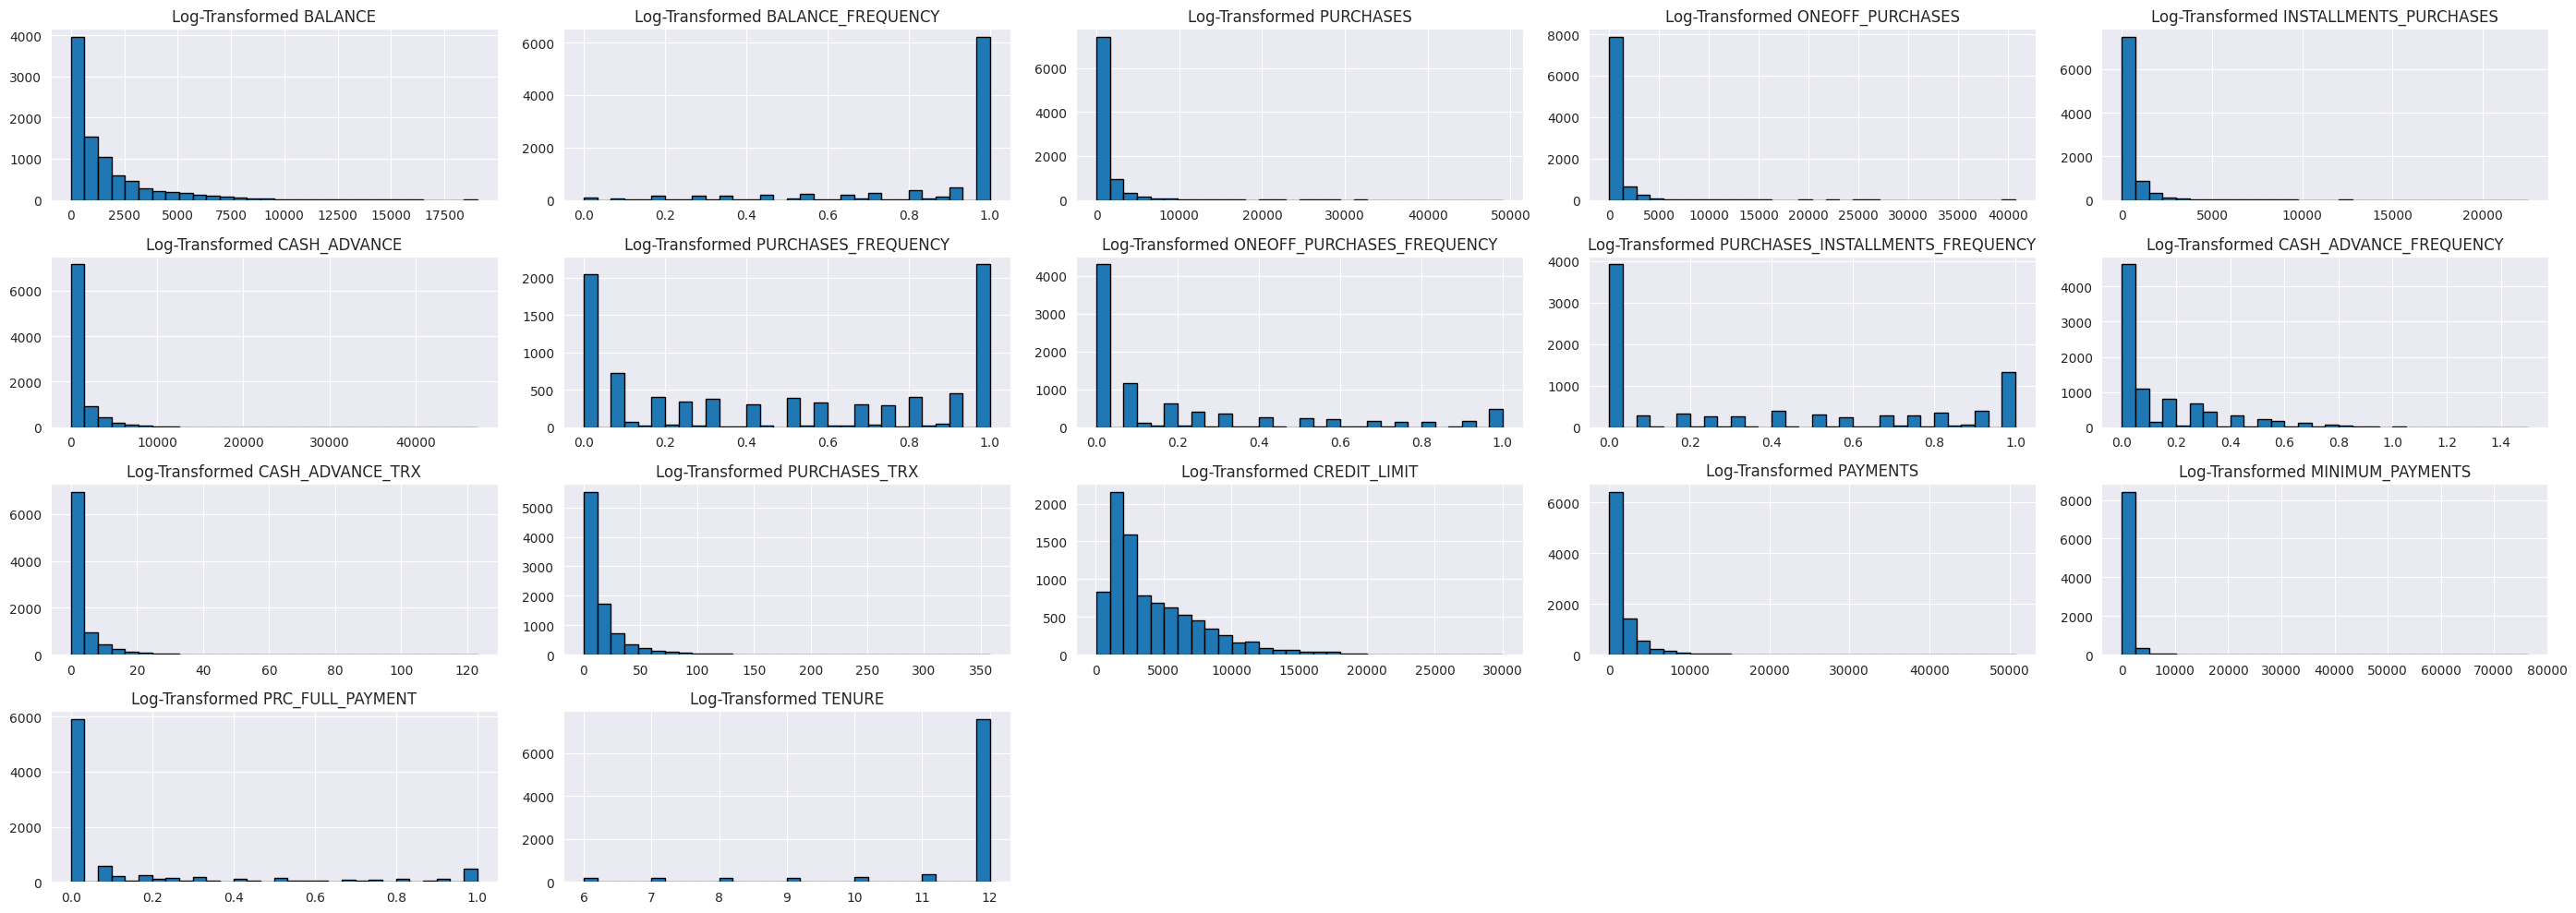

In [ ]:
data_scaled = num_df.apply(lambda x: np.log1p(x))

# Plot histograms to visualize the transformation
plt.figure(figsize=(28, 10))
for i, col in enumerate(num_df, 1):
    plt.subplot(4, 5, i)
    plt.hist(num_df[col], bins=30, edgecolor='black')
    plt.title(f'Log-Transformed {col}')

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# data_scaled = scaler.fit_transform(num_df)

# **Dimensionality Reduction**

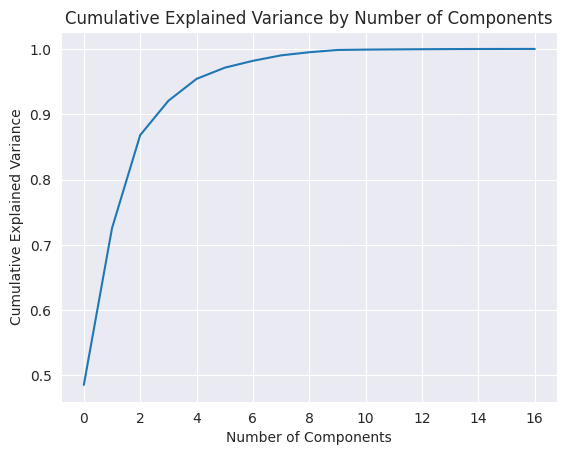

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with a high number of components
pca = PCA(n_components=None)  # None means keep all components initially
data_pca = pca.fit_transform(data_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

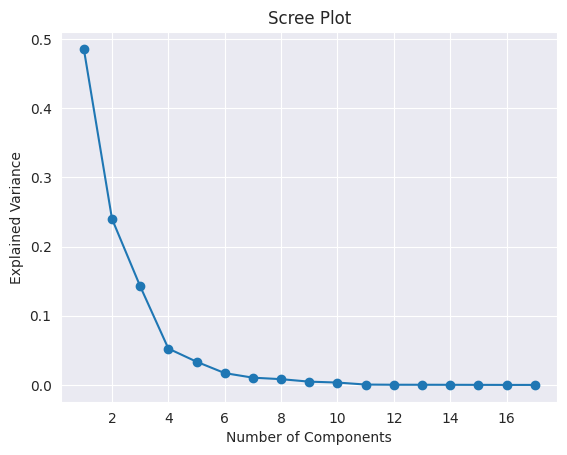

In [ ]:
pca = PCA()
pca.fit(data_scaled)
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Example: Specify the desired explained variance ratio
pca = PCA(n_components= 4)  # Keep components that explain 95% of the variance
data_pca = pca.fit_transform(data_scaled)

# **Clustering with K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 7


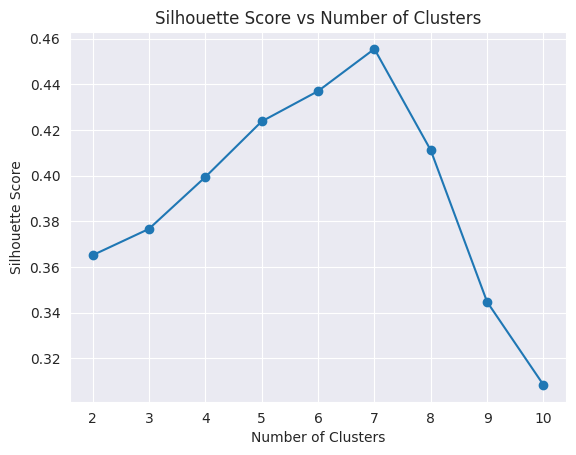

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assume data_scaled contains your preprocessed data

# Initialize a list to store silhouette scores
silhouette_scores = []

# Define the range of cluster numbers you want to test
min_clusters = 2
max_clusters = 10

for num_clusters in range(min_clusters, max_clusters+1):
    # Initialize and fit KMeans with current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters

print("Optimal number of clusters:", optimal_num_clusters)

# Plot silhouette scores
import matplotlib.pyplot as plt

plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

The best number of clusters to our algorithm using Silhouette Score is (3 clusters)

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)
X = data_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


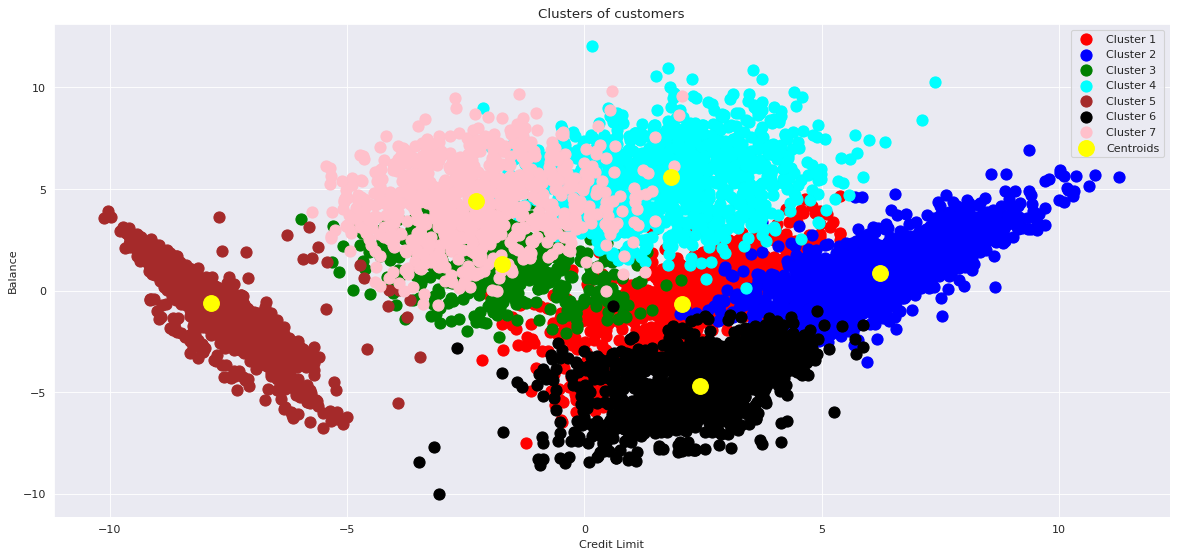

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

# **Evaluating Clustering**

In [ ]:
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

print("Done importing libraries")

Done importing libraries


In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

#Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.764
.: Silhouette Score:  0.518
.: Calinski Harabasz Index:  7972.214


# **DBSCAN Clustering**

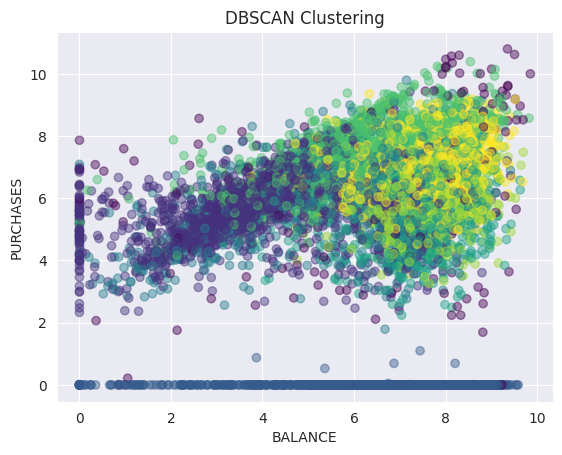

0.4468075317457671

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=20)
df['cluster'] = dbscan.fit_predict(data_pca)

# Visualize the clusters
plt.scatter(data_scaled['BALANCE'], data_scaled['PURCHASES'], c=df['cluster'], cmap='viridis', alpha=0.45)
plt.title('DBSCAN Clustering')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

silhouette_avg = silhouette_score(data_scaled, dbscan.labels_)
silhouette_avg

In [ ]:
# DEBSCAN
DB_score = davies_bouldin_score(data_scaled, dbscan.labels_)
DB_score

1.7755180553107244

# **MiniIBatch K-means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


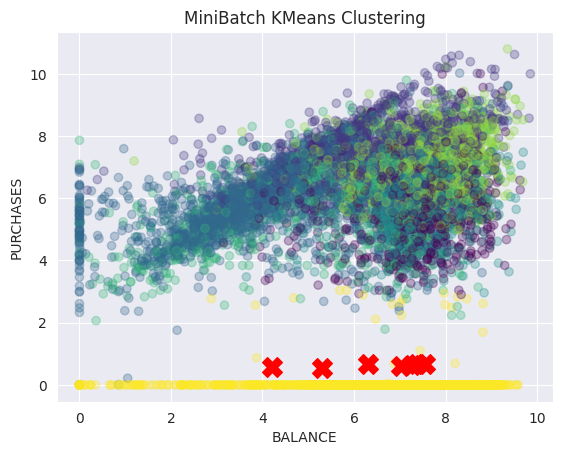

In [ ]:
mkmeans = MiniBatchKMeans(n_clusters=7, random_state=42, batch_size=100, init='k-means++')
mkmeans.fit(data_scaled)
data_scaled['cluster'] = mkmeans.labels_

# Visualize the results (example with two features)
plt.scatter(data_scaled['BALANCE'], data_scaled['PURCHASES'], c=data_scaled['cluster'], cmap='viridis', alpha=0.3)
plt.scatter(mkmeans.cluster_centers_[:, 0], mkmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('MiniBatch KMeans Clustering')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(data_scaled, mkmeans.labels_)
silhouette_avg

0.4912855533388534

In [ ]:
# MINI_ BATCH
DB_score = davies_bouldin_score(data_scaled, mkmeans.labels_)
DB_score

0.8192362837281069